# machine-learning-course-project-aditya

Use the "Run" button to execute the code.

# Diabetes Prediction Model
We need to prepare a good model using the given data on persons gender, hypertension, blood pressure etc. and need to tell that the person has diabetes or not.<br>
View and download the data here:https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

###Downloading the Dataset
Firstly we need to install certain libraries for manipulating data , opening data as dataframe, data visualization

In [1]:
!pip install opendatasets matplotlib --upgrade --quiet

Importing opendatasets library to import dataset from a url

In [2]:
import opendatasets as od

In [3]:
url = 'https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset'

In [4]:
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adityasingh1801
Your Kaggle Key: ··········


100%|██████████| 734k/734k [00:00<00:00, 75.0MB/s]

Importing pandas library to transfer data from csv file to dataframe and perfrom certain operations on data.

In [5]:
import pandas as pd

In [6]:
data_df=pd.read_csv('./diabetes-prediction-dataset/diabetes_prediction_dataset.csv')

In [7]:
data_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


The dataset contains `100000 rows` and `9 columns`

### Data Visualization
In this section we would visualize the dataset using various grapghs and look at various features that influence diabetes in the patient

In [8]:
!pip install plotly seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import plotly.express as px

In [10]:
px.histogram(data_df, x='age',nbins=80,color='gender')

From the plot above we can see that plot contains same amount of data for all ages which is good representation of the population.

In [11]:
px.histogram(data_df, x='HbA1c_level',nbins=7,color='gender')

A normal A1C level is below 5.7%, a level of 5.7% to 6.4% indicates prediabetes, and a level of 6.5% or more indicates diabetes. Within the 5.7% to 6.4% prediabetes range, the higher your A1C, the greater your risk is for developing type 2 diabetes.<br>
From the grapgh above most of the people lie in safe zone but a good of people also lie in prediabetic range.

In [12]:
px.histogram(data_df, x='blood_glucose_level',nbins=220,color='gender')

A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal. A reading of more than 200 mg/dL (11.1 mmol/L) after two hours means you have diabetes. A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) means you have prediabetes.<br>
Blood Gulcose level data also shows the same type of insights as hypertension ie. most of the people lie in safe zone but good amount has prediabetic condition and some has severe diabetes.

### Preprocessing and Feature Engineering
In this section we would look at seperating training inputs dataframes , training targets ,validation inputs, validation targets etc. from the common dataframe and manipulate some columns to make a more reliable feature.<br>
We will also look at scaling the features so that all features have same range of data and we will also transform the categorical data to numerical data using `One Hot Encoder`.

Seperating input columns from target columns

In [13]:
x_col=data_df.columns[:-1]

In [14]:
data_x_df=data_df[x_col]
data_x_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


`data_x_df` is complete input dataframe from this we need to seperate training, validation and test datasets

In [15]:
data_y_df=data_df[data_df.columns[-1]]
data_y_df

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

`data_y_df` contains all the target data.

In [16]:
!pip install jovian opendatasets graphviz scikit-learn plotly --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 78.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [17]:
data_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [18]:
males_with_diabetes = data_df[(data_df['gender'] == 'Male') & (data_df['diabetes'] == 1)]
females_with_diabetes = data_df[(data_df['gender'] == 'Female') & (data_df['diabetes'] == 1)]
others_with_diabetes = data_df[(data_df['gender'] == 'Other') & (data_df['diabetes'] == 1)]
d_df=[males_with_diabetes.diabetes.count(),females_with_diabetes.diabetes.count(),others_with_diabetes.diabetes.count()]
d_df

[4039, 4461, 0]

From the calculation above we see that `4039 males` and `4461 females` has diabetes thus diabetes is more common in females.

Seperating numerical columns from categorical columns

In [19]:
numerical_col=['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level']
category_col=['gender','smoking_history']

In [20]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


As

In [21]:
data_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


From the table above we can see that different numerical columns have different range thus we need to convert them in same range so that different range of feature does not contribute differently to importances.

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler=MinMaxScaler()
scaler.fit(data_x_df[numerical_col])
data_x_df[numerical_col]=scaler.transform(data_x_df[numerical_col])
data_x_df

<ipython-input-23-5a5278a1a550>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,1.000000,0.0,1.0,never,0.177171,0.563636,0.272727
1,Female,0.674675,0.0,0.0,No Info,0.202031,0.563636,0.000000
2,Male,0.349349,0.0,0.0,never,0.202031,0.400000,0.354545
3,Female,0.449449,0.0,0.0,current,0.156863,0.272727,0.340909
4,Male,0.949950,1.0,1.0,current,0.118231,0.236364,0.340909
...,...,...,...,...,...,...,...,...
99995,Female,1.000000,0.0,0.0,No Info,0.202031,0.490909,0.045455
99996,Female,0.024024,0.0,0.0,No Info,0.085901,0.545455,0.090909
99997,Male,0.824825,0.0,0.0,former,0.207983,0.400000,0.340909
99998,Female,0.299299,0.0,0.0,never,0.296569,0.090909,0.090909


Used `Min Max Scaler` to transfrom all numerical data between the range 0 to 1.

We need to convert the categorical data to numerical data so that we can use the data in the models<br>
For that we are using `One Hot Encoder` which will create a seperate column for each category

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
encoder=OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(data_x_df[category_col])
encoded_cols = list(encoder.get_feature_names_out(category_col))
encoded_cols

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



['gender_Female',
 'gender_Male',
 'gender_Other',
 'smoking_history_No Info',
 'smoking_history_current',
 'smoking_history_ever',
 'smoking_history_former',
 'smoking_history_never',
 'smoking_history_not current']

In [26]:
encoder.transform(data_x_df[category_col]).shape[0]

100000

In [27]:
data_x_df[encoded_cols]=encoder.transform(data_x_df[category_col])
data_x_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,Female,1.000000,0.0,1.0,never,0.177171,0.563636,0.272727,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Female,0.674675,0.0,0.0,No Info,0.202031,0.563636,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Male,0.349349,0.0,0.0,never,0.202031,0.400000,0.354545,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Female,0.449449,0.0,0.0,current,0.156863,0.272727,0.340909,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Male,0.949950,1.0,1.0,current,0.118231,0.236364,0.340909,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Female,1.000000,0.0,0.0,No Info,0.202031,0.490909,0.045455,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99996,Female,0.024024,0.0,0.0,No Info,0.085901,0.545455,0.090909,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99997,Male,0.824825,0.0,0.0,former,0.207983,0.400000,0.340909,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,Female,0.299299,0.0,0.0,never,0.296569,0.090909,0.090909,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Added new columns to the existing dataframe for each category

Creating new inputs datframe which contains only numerical columns and encoded columns created by One Hot Encoder

In [28]:
inputs=data_x_df[numerical_col+encoded_cols]
inputs

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.000000,0.0,1.0,0.177171,0.563636,0.272727,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.674675,0.0,0.0,0.202031,0.563636,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.349349,0.0,0.0,0.202031,0.400000,0.354545,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.449449,0.0,0.0,0.156863,0.272727,0.340909,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.949950,1.0,1.0,0.118231,0.236364,0.340909,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.000000,0.0,0.0,0.202031,0.490909,0.045455,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99996,0.024024,0.0,0.0,0.085901,0.545455,0.090909,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99997,0.824825,0.0,0.0,0.207983,0.400000,0.340909,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,0.299299,0.0,0.0,0.296569,0.090909,0.090909,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Creating the targets df for all targets.

In [29]:
targets=data_df[data_df.columns[-1]]
targets

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

I created a new featur called `low_health` which is  a product of `hypertension` and `heart_disease`. As i think when the person has both these disease will have more chances of `diabetes`

In [30]:
inputs['low_health']=inputs['hypertension']*inputs['heart_disease']

<ipython-input-30-a8d048bf2248>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Seperating train, validation and targets inputs and targets from the dataframes using `train_test_split`

In [31]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(data_x_df,data_y_df,test_size=0.1,random_state=42)

In [32]:
train_inputs,test_inputs,train_targets,test_targets=train_test_split(inputs,targets,test_size=0.1,random_state=42)
train_inputs,val_inputs,train_targets,val_targets=train_test_split(train_inputs,train_targets,test_size=0.15,random_state=42)

In [33]:
train_input

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
51994,Male,0.449449,0.0,0.0,never,0.082283,0.090909,0.295455,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
77540,Female,0.724725,0.0,0.0,No Info,0.324697,0.472727,0.359091,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16382,Female,0.537037,0.0,0.0,never,0.340686,0.272727,0.363636,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
83439,Male,0.837337,1.0,0.0,never,0.214519,0.400000,0.359091,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
61618,Female,0.061562,0.0,0.0,No Info,0.202031,0.454545,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,Male,0.612112,0.0,0.0,never,0.268091,0.400000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54886,Female,0.186687,0.0,0.0,never,0.211134,0.272727,0.359091,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
76820,Male,0.524525,0.0,0.0,never,0.188259,0.418182,0.022727,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
860,Female,0.461962,0.0,0.0,never,0.174486,0.490909,0.354545,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
train_target

51994    0
77540    0
16382    0
83439    0
61618    0
        ..
6265     0
54886    0
76820    0
860      0
15795    0
Name: diabetes, Length: 90000, dtype: int64

In [35]:
test_input

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
75721,Female,0.161662,0.0,0.0,No Info,0.126167,0.418182,0.209091,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
80184,Female,0.036537,0.0,0.0,No Info,0.128268,0.272727,0.295455,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19864,Male,0.787287,0.0,0.0,former,0.178688,0.000000,0.545455,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76699,Female,0.024024,0.0,0.0,never,0.086601,0.472727,0.209091,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
92991,Female,0.411912,0.0,0.0,not current,0.350957,0.490909,0.545455,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002,Male,0.774775,0.0,0.0,never,0.315243,0.727273,0.545455,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30151,Female,1.000000,0.0,0.0,never,0.171569,0.563636,0.209091,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
93194,Female,0.136637,0.0,0.0,No Info,0.150327,0.000000,0.022727,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
73199,Female,0.774775,0.0,0.0,never,0.146709,0.400000,0.340909,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
train_inputs.loc[(train_inputs.low_health==1)==True]

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,low_health
75933,0.762262,1.0,1.0,0.202031,0.563636,0.818182,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
75825,0.674675,1.0,1.0,0.202031,0.181818,0.545455,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
60611,0.974975,1.0,1.0,0.195495,0.454545,0.340909,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
82371,0.862362,1.0,1.0,0.268324,0.418182,0.359091,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
16733,0.862362,1.0,1.0,0.220121,0.563636,0.359091,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89023,0.712212,1.0,1.0,0.202848,0.472727,0.363636,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
24356,0.799800,1.0,1.0,0.387138,0.272727,0.227273,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11474,0.837337,1.0,1.0,0.202031,0.854545,0.272727,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
96651,0.787287,1.0,1.0,0.159314,0.000000,0.209091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [37]:
test_inputs

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,low_health
75721,0.161662,0.0,0.0,0.126167,0.418182,0.209091,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
80184,0.036537,0.0,0.0,0.128268,0.272727,0.295455,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19864,0.787287,0.0,0.0,0.178688,0.000000,0.545455,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
76699,0.024024,0.0,0.0,0.086601,0.472727,0.209091,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
92991,0.411912,0.0,0.0,0.350957,0.490909,0.545455,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002,0.774775,0.0,0.0,0.315243,0.727273,0.545455,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30151,1.000000,0.0,0.0,0.171569,0.563636,0.209091,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
93194,0.136637,0.0,0.0,0.150327,0.000000,0.022727,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
73199,0.774775,0.0,0.0,0.146709,0.400000,0.340909,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Forming Models
In this section we will create different models check there accuracy score.

Firstly creating a Logistic Regression model

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [39]:
model1=LogisticRegression()

Fitting the train_inputs and train_targets to the model.

In [40]:
model1.fit(train_inputs,train_targets)

LogisticRegression()

Checking the prediction made by model on training set.

In [41]:
train_preds1=model1.predict(train_inputs)

In [42]:
accuracy_score(train_preds1,train_targets)

0.9602483660130718

The prediction made by model1 on training set is 96% accurate.

In [43]:
train_targets.value_counts()

0    69954
1     6546
Name: diabetes, dtype: int64

In [44]:
percent_no=69954/(69954+6546)
percent_no

0.9144313725490196

We can see that the dumb model as 91% accurate thus our model is doing significantly well.

In [45]:
val_preds1=model1.predict(val_inputs)

In [46]:
accuracy_score(val_preds1,val_targets)

0.9607407407407408

The model is also 96% accurate on validation set.

Creating another models and checking accuracy score on training and validation sets.

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
model2=RandomForestClassifier(n_jobs=-1, random_state=42)

In [49]:
model2.fit(train_inputs,train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [50]:
train_preds2=model2.predict(train_inputs)

In [51]:
accuracy_score(train_preds2,train_targets)

0.999281045751634

In [52]:
val_preds2=model2.predict(val_inputs)

In [53]:
accuracy_score(val_preds2,val_targets)

0.9708888888888889

This model is 97.08% accurate on validation set.

### Hyperparameter Tuning
We will train some other models using different hyperparameters.<br>
In this model we are using different number of estimators for the model.

In [54]:
model3=RandomForestClassifier(n_jobs=-1, random_state=42,n_estimators=200)

In [55]:
model3.fit(train_inputs,train_targets)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [56]:
train_preds3=model3.predict(train_inputs)

In [57]:
accuracy_score(train_preds3,train_targets)

0.9993202614379085

In [58]:
val_preds3=model3.predict(val_inputs)

In [59]:
accuracy_score(val_preds3,val_targets)

0.9709629629629629

The accuracy score on validation set in this model id 97.09% which is not much greater than previous model thus number of estimators does not significantly affect accuracy score.

Defining a function which will give accuracy score on different hyperparameters of Random Forest Classifier.

In [60]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    return model.score(train_inputs, train_targets), model.score(val_inputs, val_targets)

In [61]:
test_params(n_estimators=500,max_depth=10)

(0.9718954248366013, 0.9725925925925926)

The accuracy score on validation set is 97.25% thus max_depth has significant impact.

Creating a new function which will plot RMSE with respect to diiferent hyperparameters and from those graph we will take best hyperparameter tuing.

In [62]:

def test_params1(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_score = accuracy_score(model.predict(train_inputs), train_targets)
    val_score = accuracy_score(model.predict(val_inputs), val_targets)
    return train_score, val_score

In [63]:
import matplotlib.pyplot as plt
def test_param_and_plot(param_name, param_values):
    train_scores, val_scores = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_score, val_score = test_params1(**params)
        train_scores.append(train_score)
        val_scores.append(val_score)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_scores, 'b-o')
    plt.plot(param_values, val_scores, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('accuracy')
    plt.legend(['Training', 'Validation'])

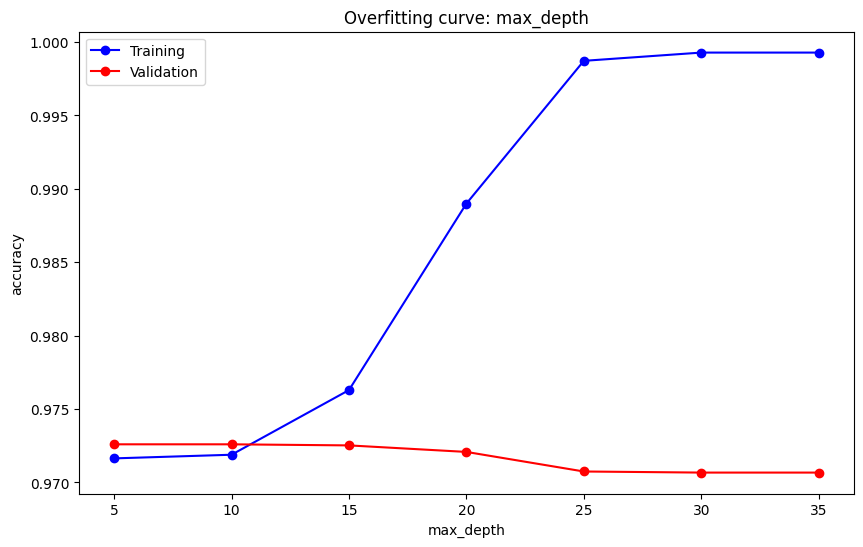

In [64]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

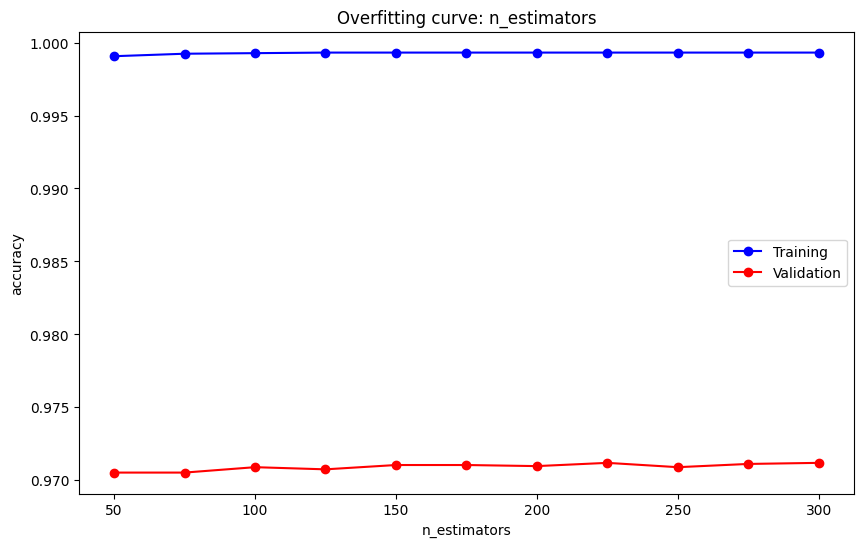

In [65]:
test_param_and_plot('n_estimators', [50, 75, 100, 125, 150, 175, 200,225,250,275,300])

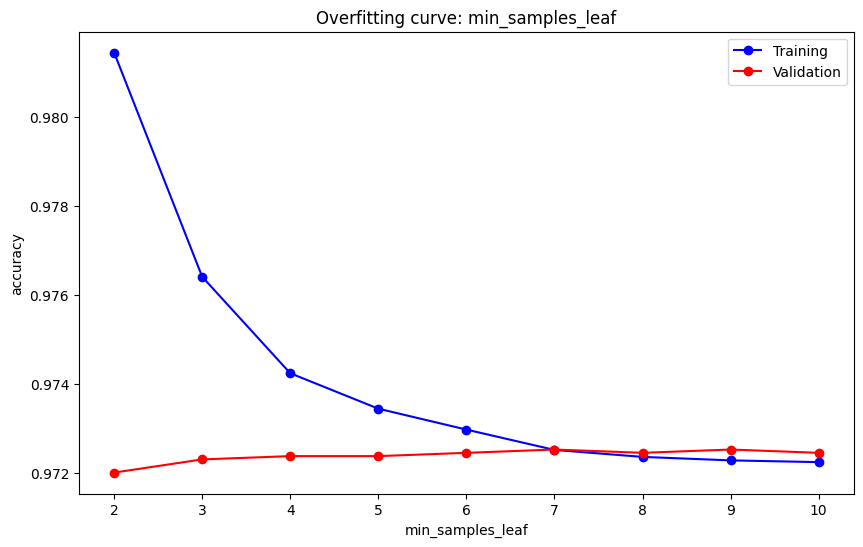

In [66]:
test_param_and_plot('min_samples_leaf', [2,3,4,5,6,7,8,9,10])

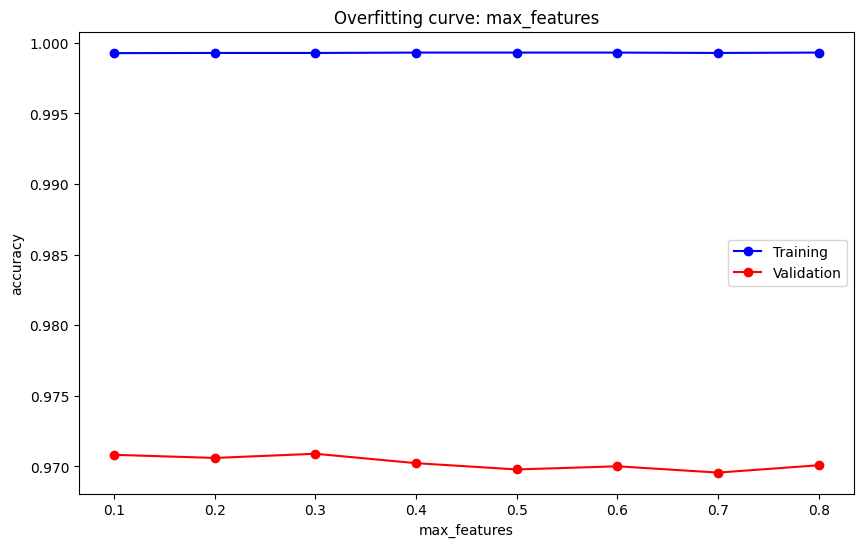

In [67]:
test_param_and_plot('max_features', [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

From the graphs above we can see best hyperparameter tuning is `n_estimators=300, max_features=0.3, min_samples_leaf=9, max_depth=10` thus we create a new model with these hyperparameter tunings.

In [68]:
model4=RandomForestClassifier(n_jobs=-1, random_state=42,n_estimators=300,max_features=0.3,min_samples_leaf=9,max_depth=10)

In [69]:
model4.fit(train_inputs,train_targets)

RandomForestClassifier(max_depth=10, max_features=0.3, min_samples_leaf=9,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [70]:
train_preds4=model4.predict(train_inputs)

In [71]:
accuracy_score(train_preds4,train_targets)

0.9716732026143791

In [72]:
val_preds4=model4.predict(val_inputs)

In [73]:
accuracy_score(val_preds4,val_targets)

0.9725925925925926

In this model the accuracy score is 97.25%

Now we will use XGBClassifier model.

In [74]:
from xgboost import XGBClassifier

In [75]:
model5 = XGBClassifier(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)


In [76]:
model5.fit(train_inputs,train_targets)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [77]:
train_preds5=model5.predict(train_inputs)
train_preds5

array([0, 0, 1, ..., 0, 0, 0])

In [78]:
accuracy_score(train_preds5,train_targets)

0.9717254901960785

In [79]:
val_preds5=model5.predict(val_inputs)

In [80]:
accuracy_score(val_preds5,val_targets)

0.9725925925925926

The accuracy score on this model is 97.25% which same as previous model.

Now by plotting we will look at best hyperparameter tuning for XGBClassifier

In [81]:
def test_params2(**params):
    model = XGBClassifier(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_score = accuracy_score(model.predict(train_inputs), train_targets)
    val_score = accuracy_score(model.predict(val_inputs), val_targets)
    return train_score, val_score

In [82]:
import matplotlib.pyplot as plt
def test_param_and_plot(param_name, param_values):
    train_scores, val_scores = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_score, val_score = test_params1(**params)
        train_scores.append(train_score)
        val_scores.append(val_score)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_scores, 'b-o')
    plt.plot(param_values, val_scores, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('accuracy')
    plt.legend(['Training', 'Validation'])

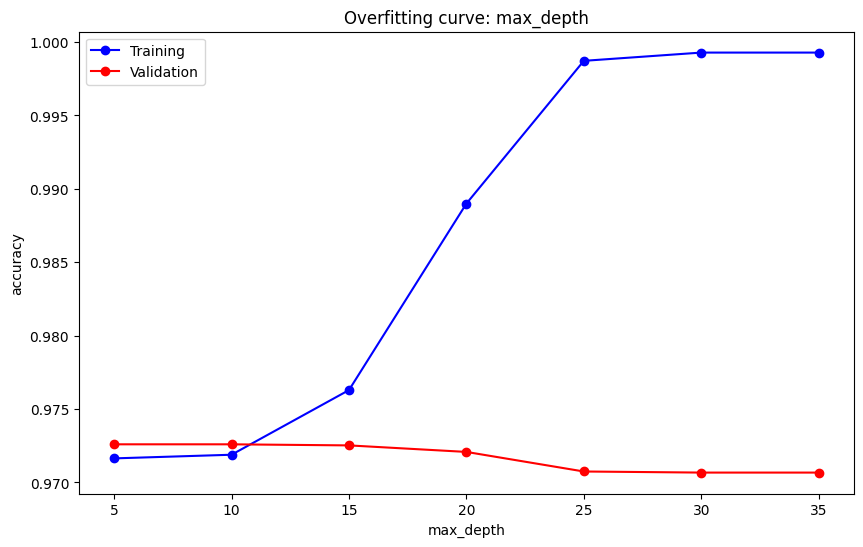

In [83]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

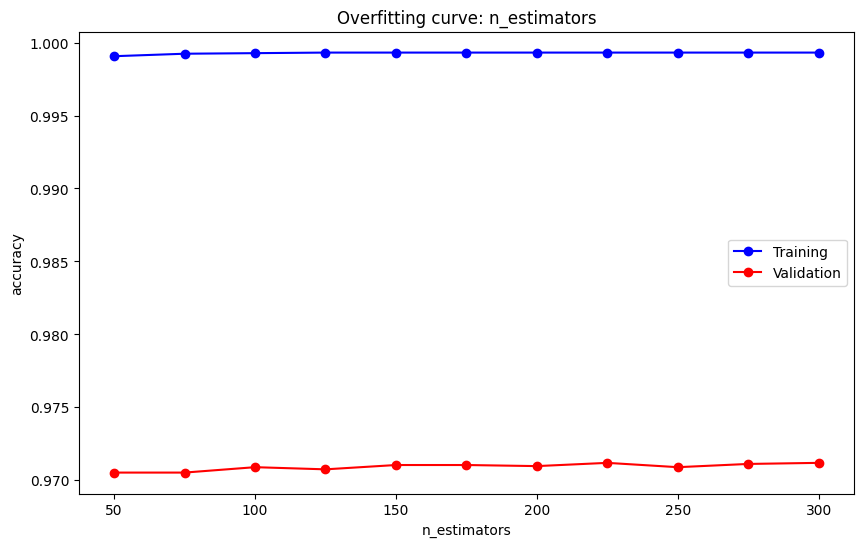

In [84]:
test_param_and_plot('n_estimators', [50, 75, 100, 125, 150, 175, 200,225,250,275,300])

Now we create another model with the best hyperparameters ie. `n_estimators=75, max_depth=5`.

In [85]:
model6 = XGBClassifier(random_state=42, n_jobs=-1, n_estimators=75, max_depth=5)

In [86]:
model6.fit(train_inputs,train_targets)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=75, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [87]:
train_preds6=model6.predict(train_inputs)

In [88]:
accuracy_score(train_preds6,train_targets)

0.9735032679738562

In [89]:
val_preds6=model6.predict(val_inputs)

In [90]:
accuracy_score(val_preds6,val_targets)

0.9728148148148148

We will look at most important features 

In [91]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model6.feature_importances_
}).sort_values('importance', ascending=False)

In [92]:
importance_df.head(10)

,feature,importance
4,HbA1c_level,0.495864
5,blood_glucose_level,0.227597
1,hypertension,0.062803
2,heart_disease,0.056036
0,age,0.039358
9,smoking_history_No Info,0.038358
7,gender_Male,0.020581
3,bmi,0.014895
10,smoking_history_current,0.008684
15,low_health,0.006993


The accuracy score in validation set in this model is 97.28% which is greater than the previous model thus hyperparameter tuning increased the accuracy.

Now we will make prediction from different models created and and fing the mean of each values to create a final model.

In [93]:
test_preds1=model1.predict(test_inputs)

In [94]:
test_preds2=model2.predict(test_inputs)

In [95]:
test_preds3=model3.predict(test_inputs)

In [96]:
test_preds4=model4.predict(test_inputs)

In [97]:
test_preds5=model5.predict(test_inputs)

In [98]:
test_preds6=model6.predict(test_inputs)

In [99]:
import numpy as np

In [100]:
pred=[test_preds1,test_preds2,test_preds3,test_preds4,test_preds5,test_preds6]

In [101]:
test_preds=np.mean(pred,axis=0)
test_preds = np.where(test_preds > 0.5, 1, 0)
test_preds

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
accuracy_score(test_preds,test_targets)

0.9729

The final accuracy score on test set is 97.29% which is a good enough accuracy.

### Summary
We are able to predict 97.29% observations in Test set accurate.<br>
From the importance dataframe we can see HbA1c_level contribute highly to the model followed by the importance of Blood glucose level.<br>
We used combination of six different models to predict the dataset


### References
Dataset: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset<br>
help:<br>
* https://stackoverflow.com/
* https://pandas.pydata.org/docs/
* https://plotly.com/python/plotly-express/
* https://scikit-learn.org/


###Future Work
We can create other features from the combination of these datasets to create other useful features and create a model with better accuracy.<br>
Feature Engineering: Explore additional features or derive new features from the existing dataset that might provide valuable information for diabetes prediction. This could involve domain knowledge research or applying techniques such as feature selection, dimensionality reduction, or creating interaction terms.<br>

Advanced Modeling Techniques: Experiment with more advanced machine learning techniques to enhance the predictive performance. Consider exploring ensemble methods (e.g., Random Forest, Gradient Boosting) or deep learning models (e.g., neural networks) to capture complex relationships in the data.<br>

Hyperparameter Tuning: Optimize the hyperparameters of the chosen model to improve its performance. Utilize techniques like grid search or Bayesian optimization to find the best combination of hyperparameters for the model.